# MSCA 32003 Assignment 6
### Wilson McDermott, Samantha Patil, and Oluwafemi Fabiyi
#### March 19, 2021 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from scipy import stats, integrate
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

import warnings
warnings.filterwarnings('ignore')

#### EDA: 

In [2]:
retail = pd.read_csv('DIGITAL Retail Digital Media Data.csv')

In [3]:
retail

,Date,Campaign_Name,Content_Category,Creative_Product,Creative,Creative_Size,Website / Network Name,Impressions_Delivered,Clicks_Recorded,Media_Cost,Units_sold
0,5/19/16,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,300x250,Amazon Media Network,2169,988,6.765564,0
1,5/19/16,Targeted Conversion Campaign,Advertising Nets,Desktop,Save Money Blue Logo,300x250,Amazon Media Network,1345,988,6.391223,0
2,5/19/16,Targeted Conversion Campaign,Advertising Nets,Desktop,Better Than Average,300x250,Amazon Media Network,2253,1087,6.421077,0
3,5/19/16,Targeted Conversion Campaign,Advertising Nets,Laptop,Better Than Average,300x250,Amazon Media Network,2281,1074,6.786280,0
4,5/19/16,Targeted Conversion Campaign,Advertising Nets,Desktop,Best value Tab,300x250,Amazon Media Network,2193,1041,6.472956,0
...,...,...,...,...,...,...,...,...,...,...,...
19730,8/12/16,Targeted Conversion Campaign,Advertising Nets,Laptop,Best value Tab,728x90,Yahoo! Network,30189,1031,10.511680,0
19731,8/12/16,Targeted Conversion Campaign,Advertising Nets,Laptop,Save Money Green Logo $,728x90,Yahoo! Network,15569,1049,8.155507,0
19732,8/12/16,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,728x90,Yahoo! Network,30172,1117,10.741370,0
19733,8/12/16,Targeted Conversion Campaign,Behavioral Targeting,Desktop,Better Products,728x90,Yahoo! Network,19780,1003,14.439026,0


In [4]:
retail.shape

(19735, 11)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     19735 non-null  object 
 1   Campaign_Name            19735 non-null  object 
 2   Content_Category         19735 non-null  object 
 3   Creative_Product         19735 non-null  object 
 4   Creative                 19735 non-null  object 
 5   Creative_Size            19735 non-null  object 
 6   Website / Network Name   19735 non-null  object 
 7   Impressions_Delivered    19735 non-null  int64  
 8   Clicks_Recorded          19735 non-null  int64  
 9   Media_Cost               19735 non-null  float64
 10  Units_sold               19735 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.7+ MB


In [6]:
retail = retail.drop(['Date'],axis=1)

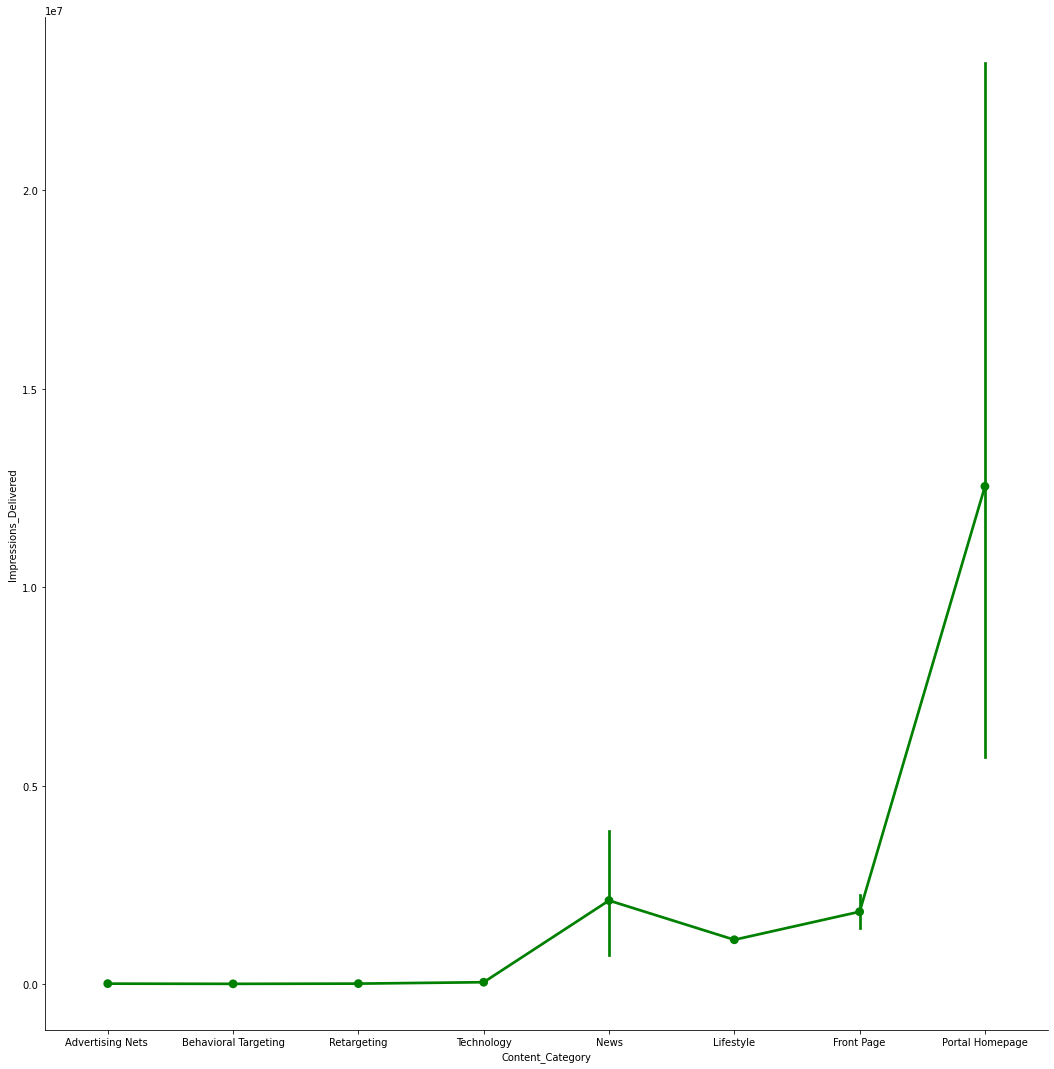

In [7]:
h = sns.PairGrid(data=retail, x_vars=['Content_Category'], y_vars='Impressions_Delivered', size=15)
h.map(sns.pointplot, color="Green")

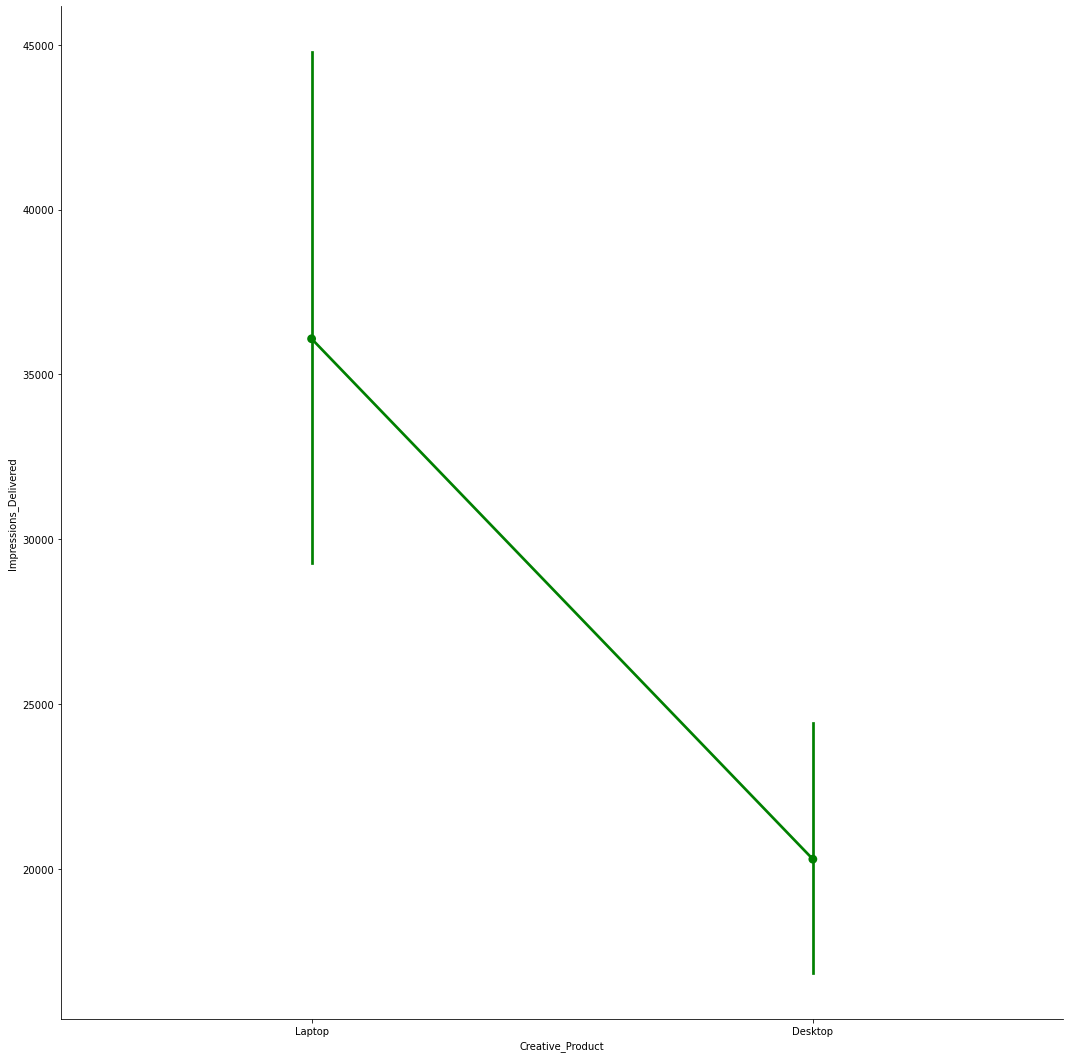

In [8]:
h = sns.PairGrid(data=retail, x_vars=['Creative_Product'], y_vars='Impressions_Delivered', size=15)
h.map(sns.pointplot, color="Green")

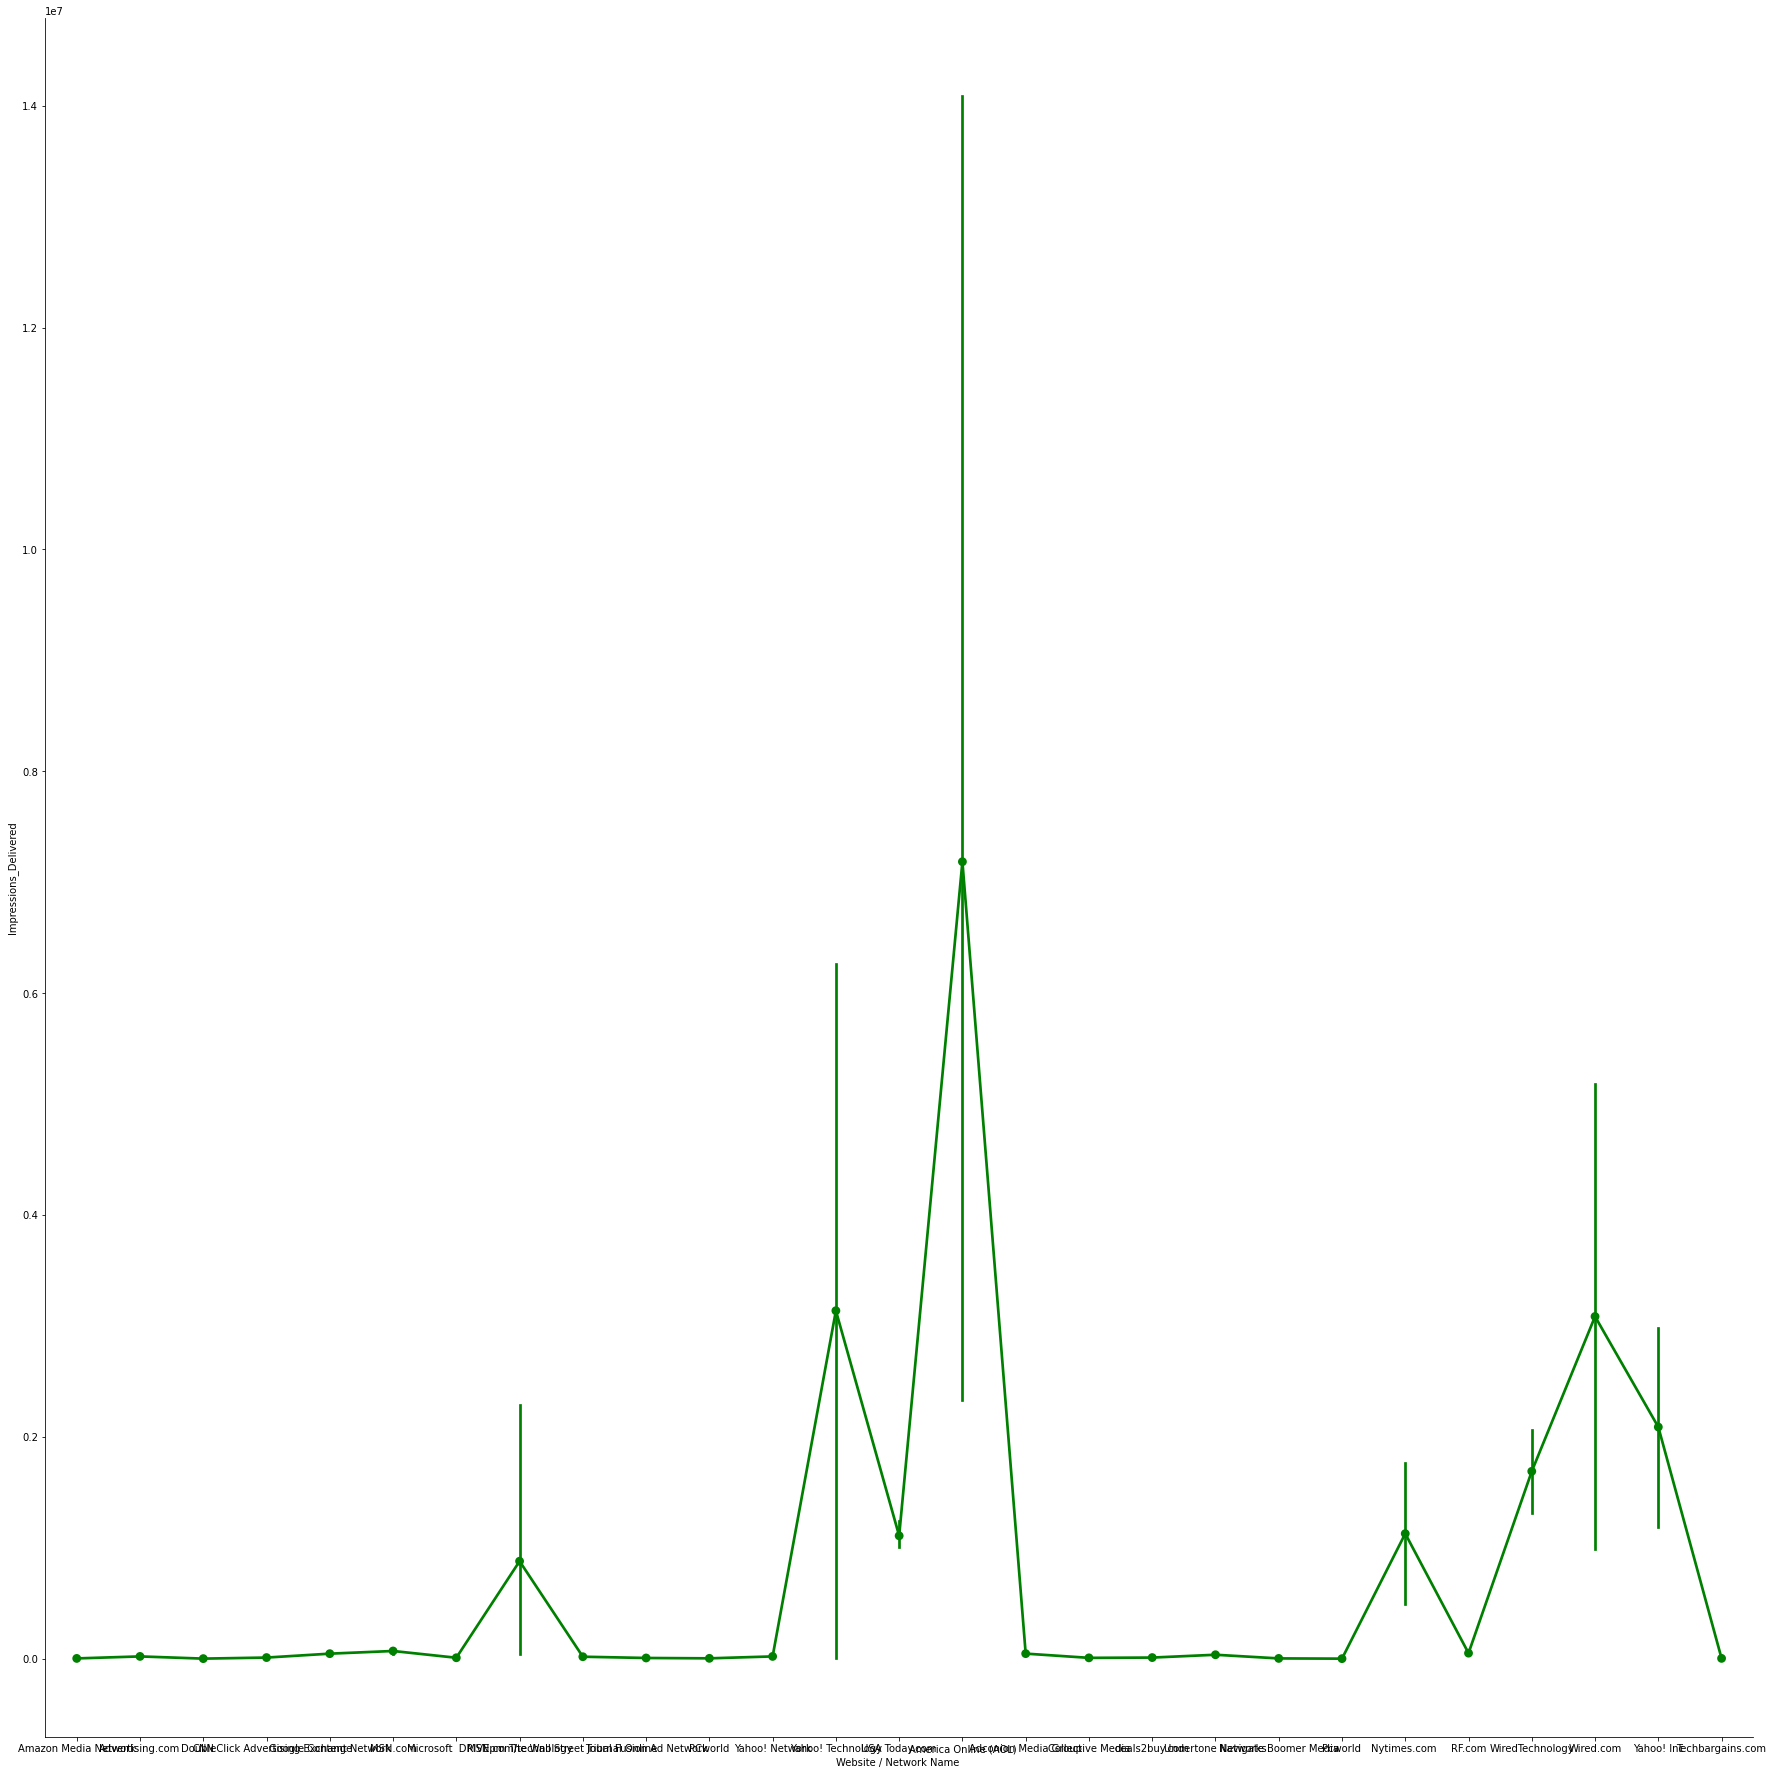

In [9]:
h = sns.PairGrid(data=retail, x_vars=['Website / Network Name '], y_vars='Impressions_Delivered', size=25)
h.map(sns.pointplot, color="Green")

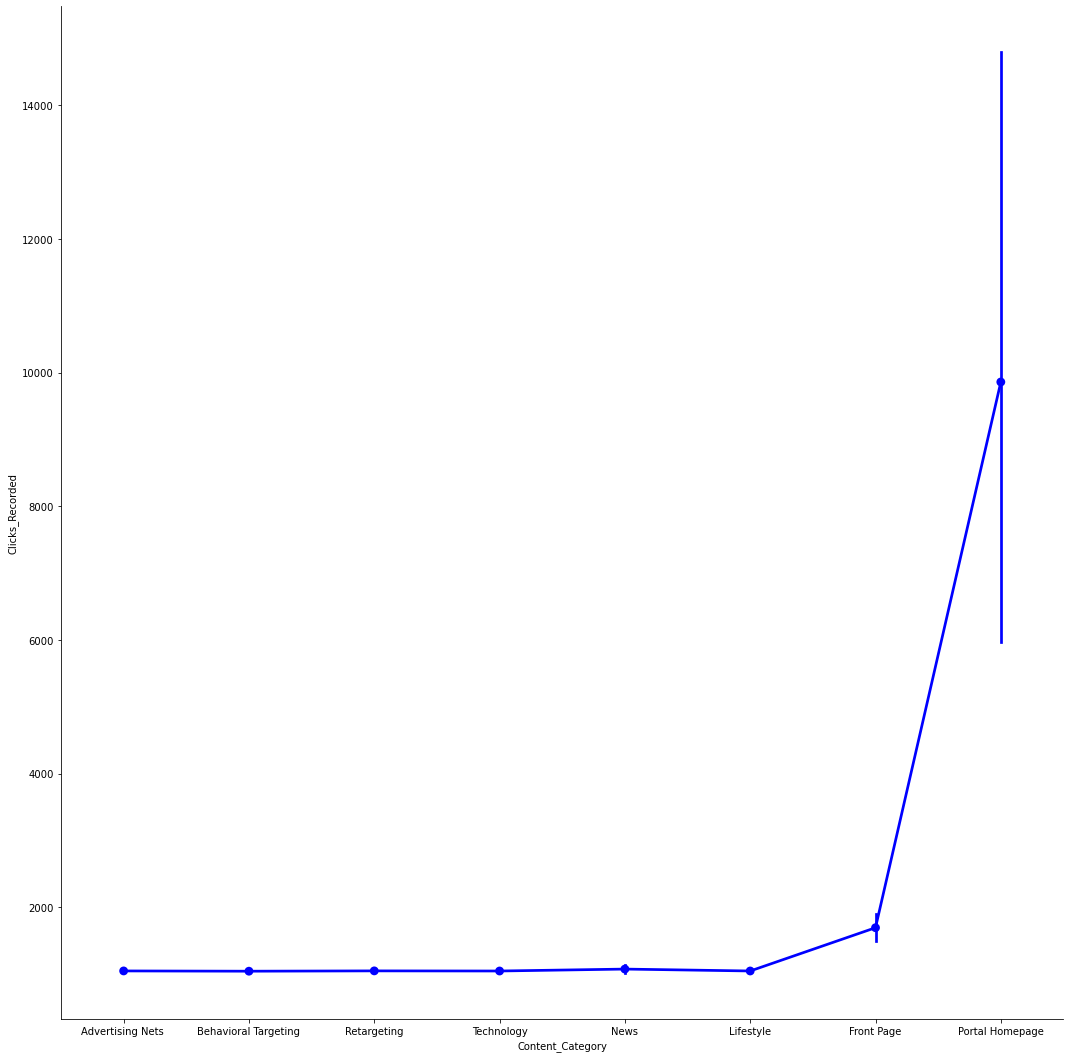

In [10]:
h = sns.PairGrid(data=retail, x_vars=['Content_Category'], y_vars='Clicks_Recorded', size=15)
h.map(sns.pointplot, color="Blue")

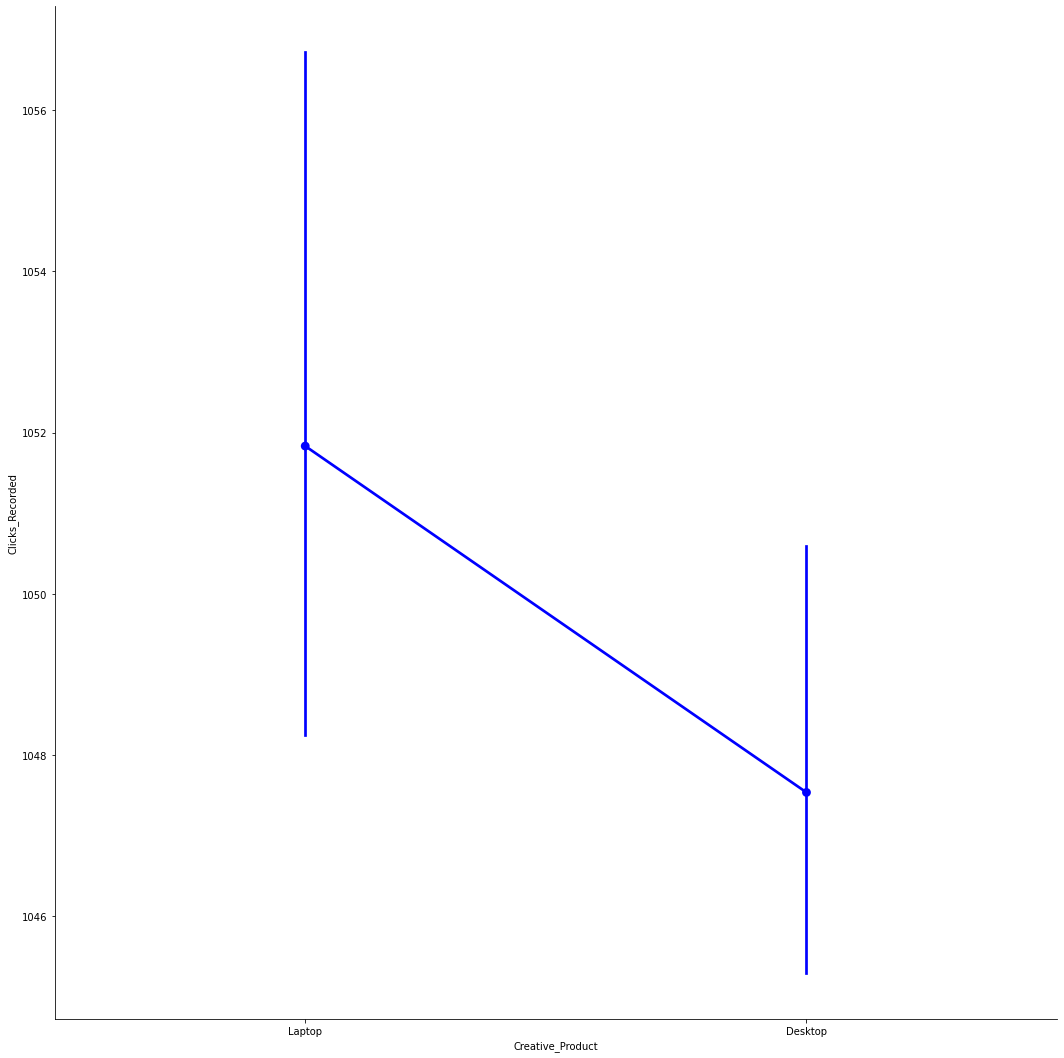

In [11]:
h = sns.PairGrid(data=retail, x_vars=['Creative_Product'], y_vars='Clicks_Recorded', size=15)
h.map(sns.pointplot, color="Blue")

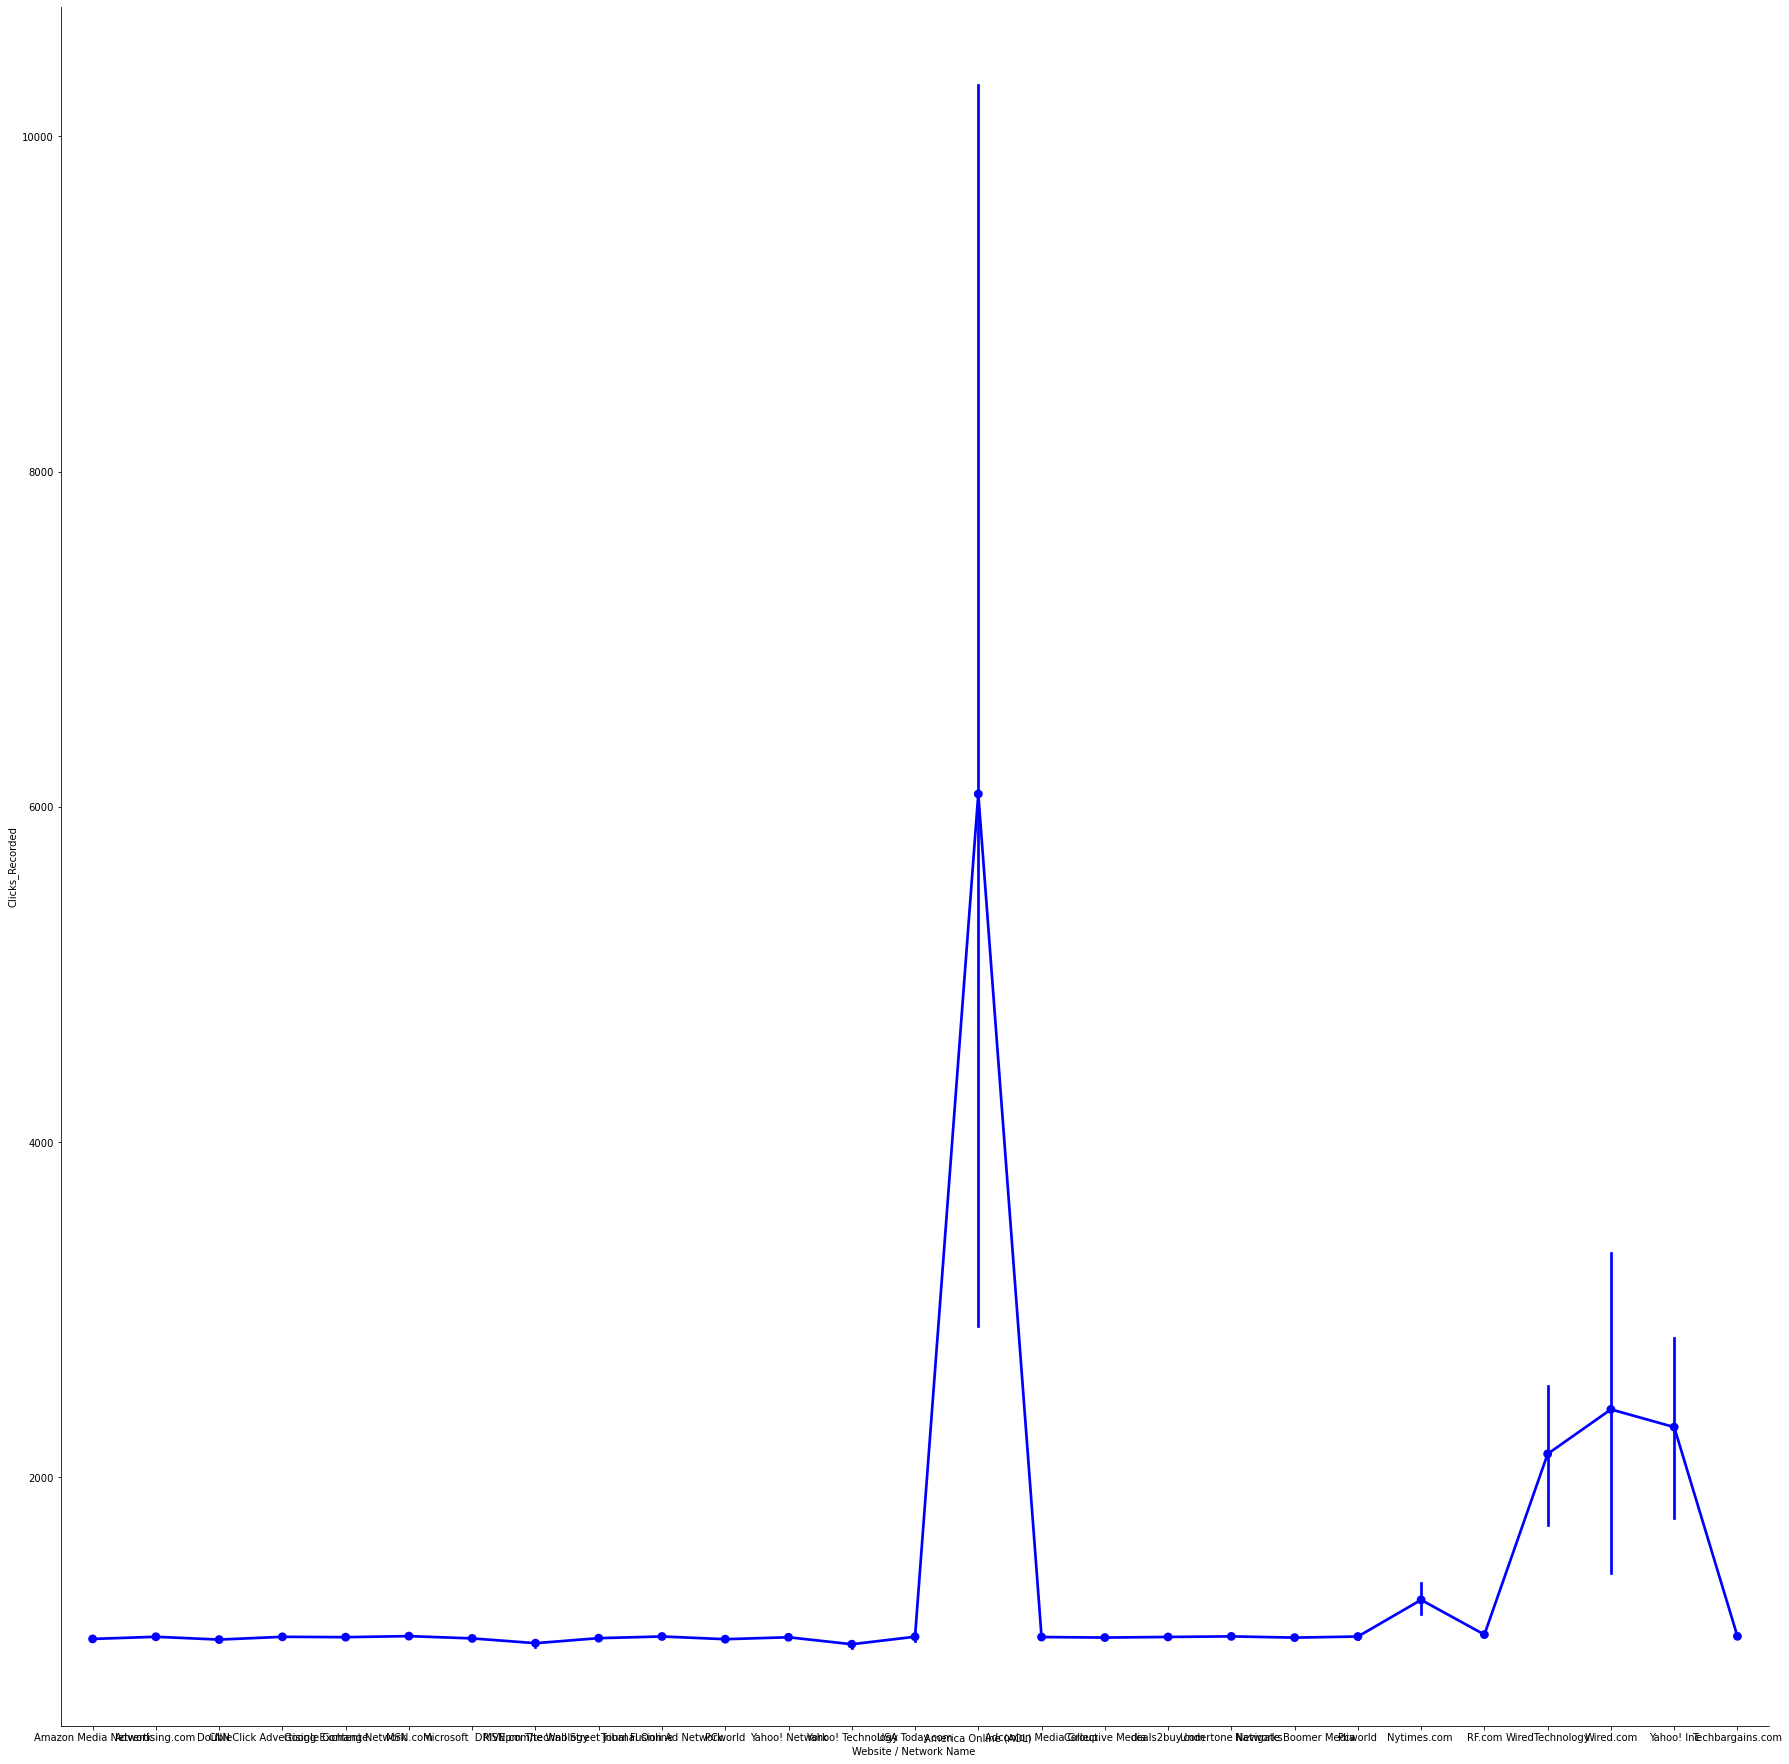

In [12]:
h = sns.PairGrid(data=retail, x_vars=['Website / Network Name '], y_vars='Clicks_Recorded', size=25)
h.map(sns.pointplot, color="Blue")

In [13]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Campaign_Name            19735 non-null  object 
 1   Content_Category         19735 non-null  object 
 2   Creative_Product         19735 non-null  object 
 3   Creative                 19735 non-null  object 
 4   Creative_Size            19735 non-null  object 
 5   Website / Network Name   19735 non-null  object 
 6   Impressions_Delivered    19735 non-null  int64  
 7   Clicks_Recorded          19735 non-null  int64  
 8   Media_Cost               19735 non-null  float64
 9   Units_sold               19735 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ MB


In [14]:
retail['CTR'] = retail['Clicks_Recorded']/retail['Impressions_Delivered']
retail['CTR'].describe()

count    19735.000000
mean         0.287203
std          0.249728
min          0.000164
25%          0.069578
50%          0.220024
75%          0.461779
max          0.996354
Name: CTR, dtype: float64

In [15]:
todummies = ['Campaign_Name','Content_Category','Creative_Product','Creative','Creative_Size','Website / Network Name ']
dummies = pd.get_dummies(retail[todummies])
retailtrain = pd.concat([dummies,retail],axis=1)

In [16]:
retailtrain = retailtrain.drop(['Campaign_Name'], axis=1)
retailtrain = retailtrain.drop(['Content_Category'], axis=1)
retailtrain = retailtrain.drop(['Creative_Product'], axis=1)
retailtrain = retailtrain.drop(['Creative'], axis=1)
retailtrain = retailtrain.drop(['Creative_Size'], axis=1)
retailtrain = retailtrain.drop(['Website / Network Name '], axis=1)
retailtrain = retailtrain.drop(['Clicks_Recorded'], axis=1)
retailtrain = retailtrain.drop(['Impressions_Delivered'], axis=1)

#### Fitting Preliminary Models (Clicks):  

In [17]:
X,y=retailtrain.drop(['CTR'],axis=1),retailtrain['CTR']
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

def RegressorFit(model): 
    Regressor = model()
    Regressor.fit(train_X, train_y)
    Regressor.predict(val_X)
    return Regressor

#### Linear Regression:

In [18]:
linearregression = RegressorFit(LinearRegression)

acc_lin_reg = round( linearregression.score(val_X, val_y) * 100, 2)
print (str(acc_lin_reg) + ' percent')

44.43 percent


#### Decision Tree: 

In [19]:
decisiontree = RegressorFit(DecisionTreeRegressor)

acc_decision_tree = round(decisiontree.score(val_X, val_y) * 100, 2)
print(round(acc_decision_tree,2,), ' percent')

92.01  percent


#### Random Forest: 

In [20]:
forest = RegressorFit(RandomForestRegressor)

acc_random_forest = round(forest.score(val_X, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

95.19  percent


#### KNeighbors Regressor:

In [21]:
KNN = RegressorFit(KNeighborsRegressor)

acc_KNN = round(KNN.score(val_X, val_y) * 100, 2)
print(round(acc_KNN,2,), ' percent')

94.19  percent


##### Selecting Hyperparameters Via Randomized Search CV: 

In [22]:
forest_2 = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

RandomForestCV = RandomizedSearchCV(forest_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)

RandomForestCV.fit(train_X, train_y)
RandomForestCV.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [23]:
rs_df = pd.DataFrame(RandomForestCV.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,600,23,2,sqrt,15,False,0.930543,1
1,400,23,2,sqrt,14,False,0.925931,2
2,700,12,2,sqrt,13,False,0.924971,3
3,800,28,12,sqrt,14,True,0.886619,4
4,100,2,18,sqrt,15,False,0.885661,5
5,500,12,18,sqrt,13,False,0.880673,6
6,700,23,7,log2,15,False,0.877419,7
7,1000,12,7,sqrt,10,True,0.873684,8
8,600,50,23,sqrt,14,False,0.872484,9
9,700,2,2,log2,11,True,0.870949,10


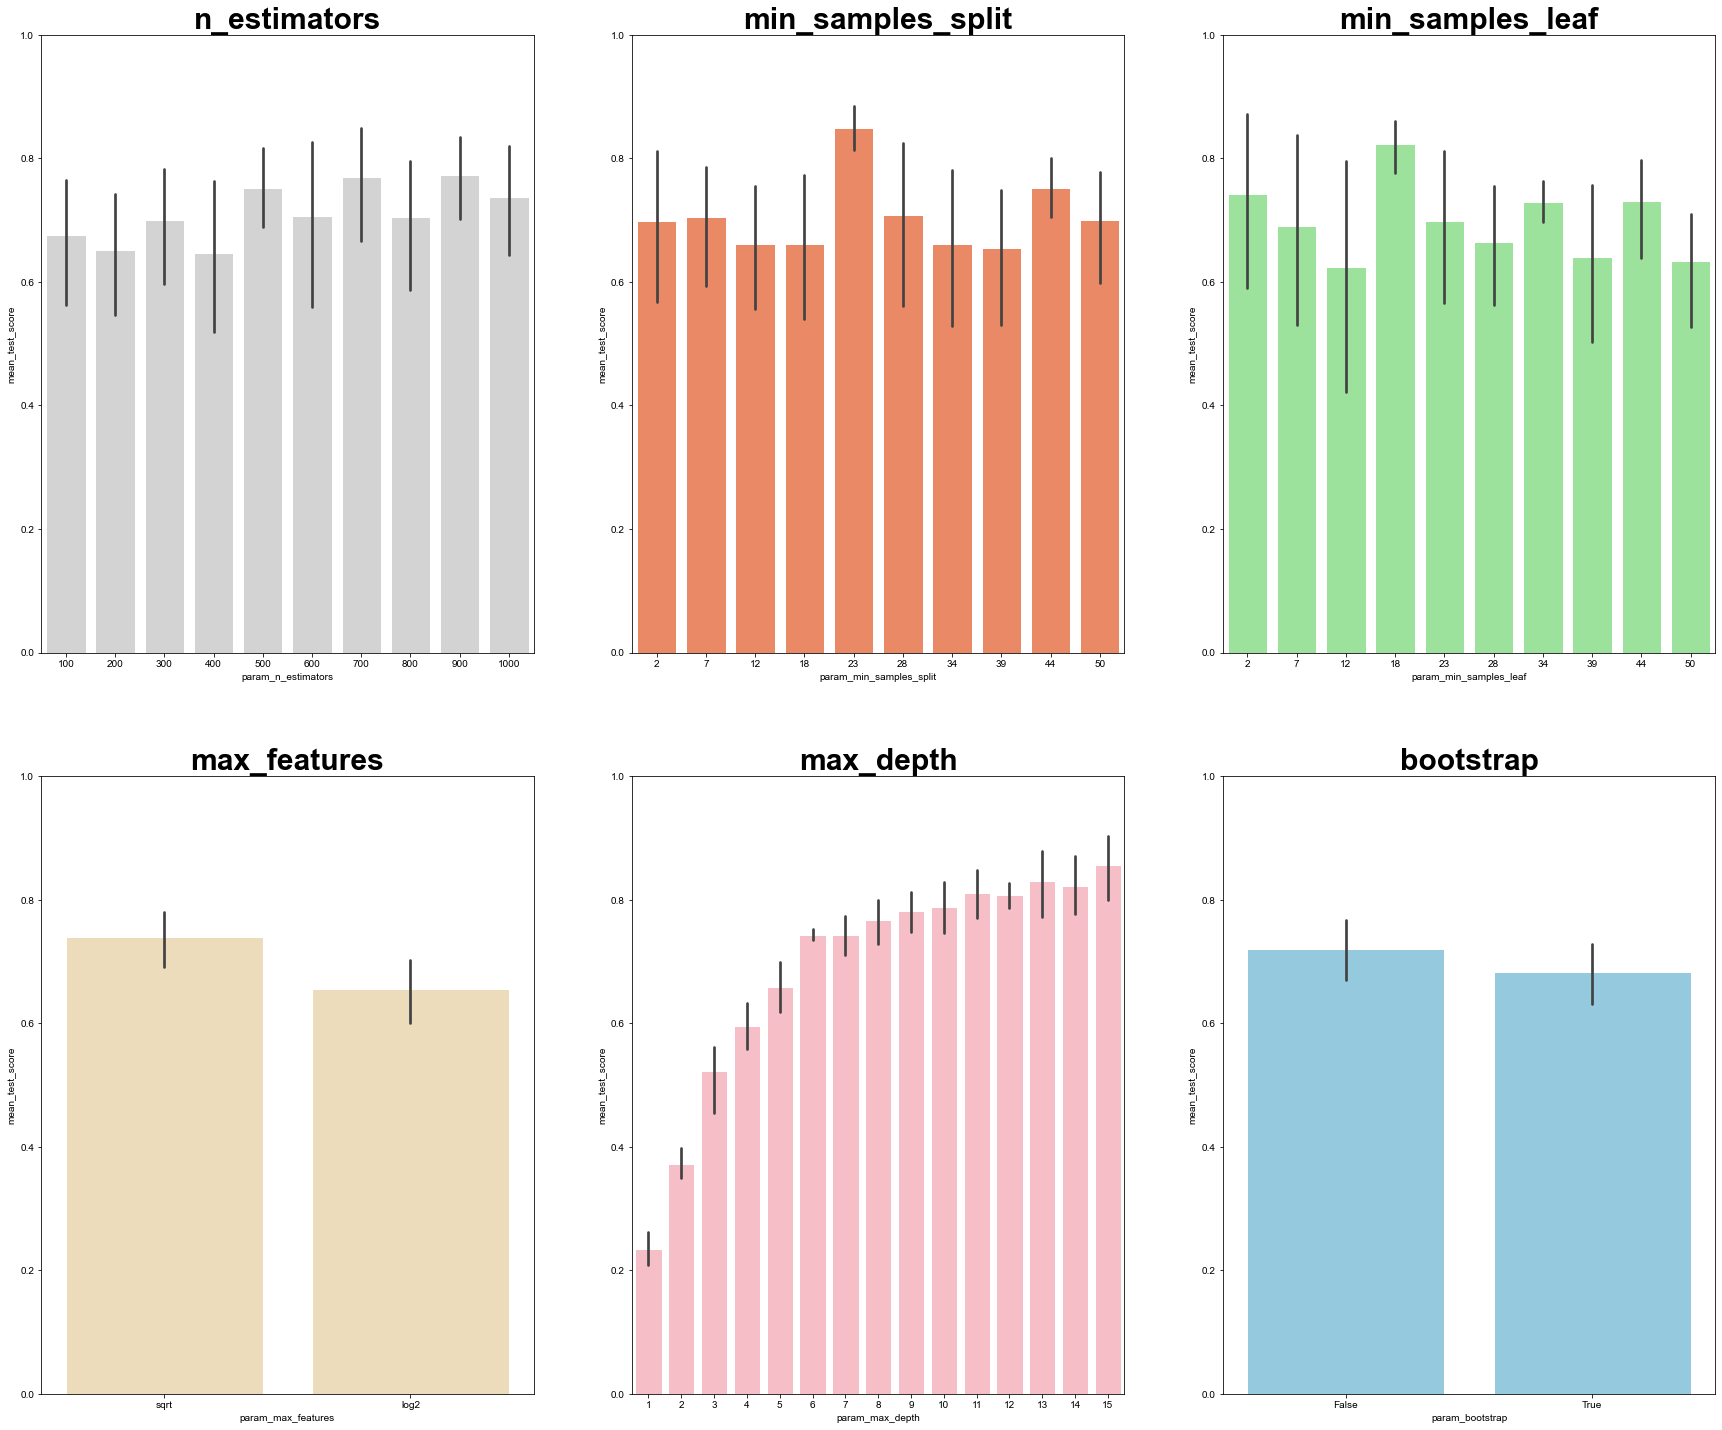

In [24]:
fig, axs = plt.subplots(ncols=3, nrows=2)

sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([0,1])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([0,1])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([0,1])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([0,1])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([0,1])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([0,1])

axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

plt.show()

In [25]:
RandomForestCV.best_params_

{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [26]:
rfbest = RandomForestRegressor(n_estimators = 700,min_samples_split = 12,min_samples_leaf = 2,max_features = 'sqrt',max_depth = 13,bootstrap = False)
rfbest.fit(train_X, train_y)

y_pred_rfbest = rfbest.predict(val_X)

y_pred_train=rfbest.predict(train_X)

rmse_test = MSE(val_y, y_pred_rfbest)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of rfbest: {:.2f}'.format(rmse_test))
print('Train set RMSE of rfbest: {:.2f}'.format(rmse_train))

acc_BestRandomForestRegressor = round(rfbest.score(val_X, val_y) * 100, 2)
print(round(acc_BestRandomForestRegressor,2,), ' percent')


Test set RMSE of rfbest: 0.07
Train set RMSE of rfbest: 0.06
93.14  percent


#### Ensemble Methods (Clicks): 

##### Gradient Boosting Regressor: 

In [27]:
gb = GradientBoostingRegressor()

gb.fit(train_X, train_y)

y_pred_Gboost = gb.predict(val_X)

y_pred_train=gb.predict(train_X)

rmse_test = MSE(val_y, y_pred_Gboost)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of gb: {:.2f}'.format(rmse_test))
print('Train set RMSE of gb: {:.2f}'.format(rmse_train))

acc_GradientBoostingRegressor = round(gb.score(val_X, val_y) * 100, 2)
print(round(acc_GradientBoostingRegressor,2,), ' percent')

Test set RMSE of gb: 0.05
Train set RMSE of gb: 0.06
95.21  percent


##### Voting Regressor (Gradient Boosting Regressor, Random Forest, Decision Tree): 

In [28]:
gb = GradientBoostingRegressor(random_state=1)

rf = RandomForestRegressor(random_state=1)

dt = DecisionTreeRegressor(random_state=1)

regressors = [('Gradient Boosting Regressor', gb), ('Decision Tree', dt),('Random Forest',rf)]

In [29]:
vc = VotingRegressor(estimators=regressors)     

vc.fit(train_X, train_y)   

y_pred = vc.predict(val_X)

y_pred_train=vc.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_VotingRegressor = round(vc.score(val_X, val_y) * 100, 2)
print('Voting Regressor:',round(acc_VotingRegressor,2,), ' percent')

Test set RMSE of VC: 0.05
Train set RMSE of VC: 0.03
Voting Regressor: 95.27  percent


##### Voting Regressor (KNeighbors Regressor, Random Forest, Decision Tree): 

In [30]:
KNN = KNeighborsRegressor()

rf = RandomForestRegressor(random_state=1)

dt = DecisionTreeRegressor(random_state=1)

regressors = [('K Neighbors Regressor', KNN), ('Decision Tree', dt),('Random Forest',rf)]

In [31]:
vc = VotingRegressor(estimators=regressors)     

vc.fit(train_X, train_y)   

y_pred = vc.predict(val_X)

y_pred_train=vc.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_VotingRegressor2 = round(vc.score(val_X, val_y) * 100, 2)
print('Voting Regressor:',round(acc_VotingRegressor2,2,), ' percent')

Test set RMSE of VC: 0.06
Train set RMSE of VC: 0.02
Voting Regressor: 95.08  percent


##### AdaBoost Regressor: 

In [32]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)

regr.fit(train_X, train_y)

y_pred = regr.predict(val_X)

y_pred_train=regr.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)

print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_AdaBoostRegressor = round(regr.score(val_X, val_y) * 100, 2)
print('AdaBoost Regressor:',round(acc_AdaBoostRegressor,2,), ' percent')

Test set RMSE of VC: 0.08
Train set RMSE of VC: 0.08
AdaBoost Regressor: 90.27  percent


#### Click Model Comparisons: 

In [33]:
Click_Models = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Decision Tree','Random Forest', 
              'KNN','Gradient Boosting Regressor', 'VotingRegressor (Gradient Boosting Regressor, Decision Tree and Random Forest)', 
              'VotingRegressor (KNN, Decision Tree and Random Forest)', 'AdaBoost Regressor','RandomSearch CV RandomForestRegressor'],
    
    'Score': [acc_lin_reg, acc_decision_tree,acc_random_forest, 
              acc_KNN, acc_GradientBoostingRegressor, acc_VotingRegressor, 
              acc_VotingRegressor2, acc_AdaBoostRegressor,acc_BestRandomForestRegressor]
    })
Click_Models['Score'] = pd.Series(["{0:.2f}%".format(val) for val in Click_Models['Score']], index = Click_Models.index)
Click_Models.sort_values(by='Score', ascending=False)

,Model,Score
5,"VotingRegressor (Gradient Boosting Regressor, ...",95.27%
4,Gradient Boosting Regressor,95.21%
2,Random Forest,95.19%
6,"VotingRegressor (KNN, Decision Tree and Random...",95.08%
3,KNN,94.19%
8,RandomSearch CV RandomForestRegressor,93.14%
1,Decision Tree,92.01%
7,AdaBoost Regressor,90.27%
0,Simple Linear Regression,44.43%


#### Fitting Preliminary Models (Conversion): 

In [34]:
retailtrain['Units_sold'].value_counts() #Given conversion is not binary solving as regression problem first

0     18963
1       511
2       130
3        58
4        24
5        19
6        10
8         6
10        4
7         4
11        3
15        1
13        1
9         1
Name: Units_sold, dtype: int64

In [35]:
X,y=retailtrain.drop(['Units_sold'],axis=1),retailtrain['Units_sold']
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

def RegressorFit(model): 
    Regressor = model()
    Regressor.fit(train_X, train_y)
    Regressor.predict(val_X)
    return Regressor

#### Linear Regression:

In [36]:
linearregression = RegressorFit(LinearRegression)

acc_lin_reg = round( linearregression.score(val_X, val_y) * 100, 2)
print (str(acc_lin_reg) + ' percent')

37.32 percent


#### Decision Tree: 

In [37]:
decisiontree = RegressorFit(DecisionTreeRegressor)

acc_decision_tree = round(decisiontree.score(val_X, val_y) * 100, 2)
print(round(acc_decision_tree,2,), ' percent')

-14.63  percent


#### Random Forest:

In [38]:
forest = RegressorFit(RandomForestRegressor)

acc_random_forest = round(forest.score(val_X, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

28.01  percent


#### KNeighbors Regressor: 

In [39]:
KNN = RegressorFit(KNeighborsRegressor)

acc_KNN = round(KNN.score(val_X, val_y) * 100, 2)
print(round(acc_KNN,2,), ' percent')

21.94  percent


In [40]:
forest_2 = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

RandomForestCV = RandomizedSearchCV(forest_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)

RandomForestCV.fit(train_X, train_y)
RandomForestCV.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

In [41]:
rs_df = pd.DataFrame(RandomForestCV.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,2,2,log2,11,True,0.429895,1
1,600,23,2,sqrt,15,False,0.429557,2
2,400,23,2,sqrt,14,False,0.429407,3
3,700,12,2,sqrt,13,False,0.425321,4
4,700,23,7,log2,15,False,0.420791,5
5,1000,44,2,sqrt,9,True,0.420389,6
6,700,18,7,sqrt,7,False,0.419767,7
7,1000,12,7,sqrt,10,True,0.417146,8
8,600,50,2,sqrt,7,False,0.412698,9
9,300,28,7,log2,13,True,0.403801,10


Given low accuracy of conversion from a regression standpoint, we proceed to predict conversion as a binary classification probelm based on a single purchase or not:

In [42]:
def Conversion(x):
    if x < 1:
        return 0
    elif x>= 1:
        return 1

In [43]:
retailtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 55 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Campaign_Name_Targeted Conversion Campaign                19735 non-null  uint8  
 1   Content_Category_Advertising Nets                         19735 non-null  uint8  
 2   Content_Category_Behavioral Targeting                     19735 non-null  uint8  
 3   Content_Category_Front Page                               19735 non-null  uint8  
 4   Content_Category_Lifestyle                                19735 non-null  uint8  
 5   Content_Category_News                                     19735 non-null  uint8  
 6   Content_Category_Portal Homepage                          19735 non-null  uint8  
 7   Content_Category_Retargeting                              19735 non-null  uint8  
 8   Content_Category

In [44]:
retail['Conversion'] = retail.Units_sold.apply(lambda x: Conversion(x))

#### Refitting Preliminary Models (Conversion Classification): 

In [48]:
RetailTrain = retail.copy()

RetailTrain = pd.concat([dummies,retail],axis=1)
RetailTrain = RetailTrain.drop(['Campaign_Name'], axis=1)
RetailTrain = RetailTrain.drop(['Content_Category'], axis=1)
RetailTrain = RetailTrain.drop(['Creative_Product'], axis=1)
RetailTrain = RetailTrain.drop(['Creative'], axis=1)
RetailTrain = RetailTrain.drop(['Creative_Size'], axis=1)
RetailTrain = RetailTrain.drop(['Website / Network Name '], axis=1)
RetailTrain = RetailTrain.drop(['Units_sold'],axis=1)

In [49]:
X,y=RetailTrain.drop(['Conversion'],axis=1),RetailTrain['Conversion']
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

def classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(val_X, val_y))
    return classifier

#### Logistic Regression: 

In [50]:
logisticregression = classifier(LogisticRegression)

acc_log_reg = round( logisticregression.score(val_X, val_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

0.9619964530022802
96.2 percent


#### Decision Tree: 

In [51]:
decisiontree = classifier(DecisionTreeClassifier)

acc_decision_tree = round(decisiontree.score(val_X, val_y) * 100, 2)
print(round(acc_decision_tree,2,), ' percent')

0.952115530782873
95.21  percent


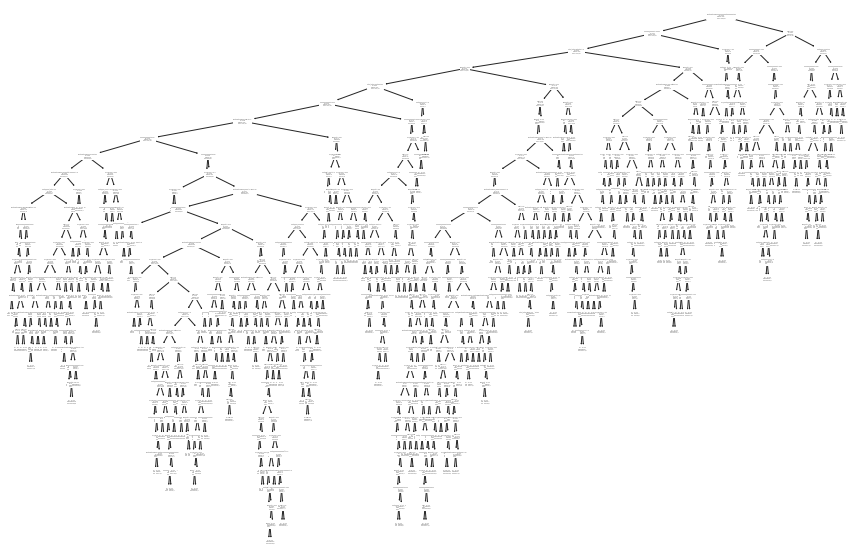

In [52]:
plt.figure(figsize=(15,10))
plot = tree.plot_tree(decisiontree, feature_names = train_X.columns)

#### Random Forest Classifier: 

In [53]:
forest = classifier(RandomForestClassifier)

acc_random_forest = round(forest.score(val_X, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

0.9678236635419306
96.78  percent


#### KNeighbors  Classifier:

In [54]:
KNN = classifier(KNeighborsClassifier)

acc_KNN = round(KNN.score(val_X, val_y) * 100, 2)
print(round(acc_KNN,2,), ' percent')

0.9607296681023563
96.07  percent


#### Linear SVC:

In [55]:
SVC = classifier(LinearSVC)
acc_linear_svc = round( SVC.score(val_X, val_y) * 100, 2)
print (str(acc_linear_svc) + ' percent')

0.9239929060045604
92.4 percent


#### Naive Bayes Via GaussianNB: 

In [56]:
gnb = classifier(GaussianNB)

acc_gnb = round(gnb.score(val_X, val_y) * 100, 2)
print(round(acc_gnb,2,), ' percent')

0.9602229541423867
96.02  percent


#### Perceptron: 

In [57]:
perceptronmodel = classifier(Perceptron)

acc_perceptron = round(perceptronmodel.score(val_X, val_y) * 100, 2)
print(round(acc_perceptron,2,), ' percent')

0.12034456549277933
12.03  percent


#### SGD Classifier: 

In [58]:
sgdmodel = classifier(SGDClassifier)

acc_sgd = round(sgdmodel.score(val_X, val_y) * 100, 2)
print(round(acc_sgd,2,), ' percent')

0.9614897390423106
96.15  percent


In [59]:
y_pred = forest.predict(val_X)

mse_forest = MSE(val_y, y_pred)

rmse_forest = mse_forest**(1/2)

print("Test set RMSE of the forest model is: {:.2f}".format(rmse_forest))

Test set RMSE of the forest model is: 0.18


#### Ensemble Methods (Conversions Classification): 

##### Gradient Boosting Classifier: 

In [60]:
gb = GradientBoostingClassifier()

gb.fit(train_X, train_y)

y_pred_Gboost = gb.predict(val_X)

y_pred_train=gb.predict(train_X)

rmse_test = MSE(val_y, y_pred_Gboost)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of gb: {:.2f}'.format(rmse_test))
print('Train set RMSE of gb: {:.2f}'.format(rmse_train))

acc_GradientBoostingClassifier = round(gb.score(val_X, val_y) * 100, 2)
print(round(acc_GradientBoostingClassifier,2,), ' percent')

Test set RMSE of gb: 0.17
Train set RMSE of gb: 0.16
96.96  percent


##### Voting Regressor (Gradient Boosting Classifier, Random Forest Classifier, Decision Tree Classifier): 

In [61]:
gb = GradientBoostingClassifier(random_state=1)

rf = RandomForestClassifier(random_state=1)

dt = DecisionTreeClassifier(random_state=1)

Classifiers = [('Gradient Boosting Classifier', gb), ('Decision Tree Classifier', dt),('Random Forest Classifier',rf)]

In [62]:
vc = VotingClassifier(estimators=Classifiers)     

vc.fit(train_X, train_y)   

y_pred = vc.predict(val_X)

y_pred_train=vc.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_VotingClassifier = round(vc.score(val_X, val_y) * 100, 2)
print('Voting Regressor:',round(acc_VotingClassifier,2,), ' percent')

Test set RMSE of VC: 0.18
Train set RMSE of VC: 0.00
Voting Regressor: 96.91  percent


##### Voting Regressor (KNeighbors Classifier, Random Forest Classifier, Decision Tree Classifier): 

In [63]:
KNN = KNeighborsClassifier()

rf = RandomForestClassifier(random_state=1)

dt = DecisionTreeClassifier(random_state=1)

Classifiers = [('KNeighborsClassifier', KNN), ('Decision Tree Classifier', dt),('Random Forest Classifier',rf)]

In [64]:
vc = VotingClassifier(estimators=Classifiers)     

vc.fit(train_X, train_y)   

y_pred = vc.predict(val_X)

y_pred_train=vc.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_VotingClassifier2 = round(vc.score(val_X, val_y) * 100, 2)
print('Voting Regressor:',round(acc_VotingClassifier2,2,), ' percent')

Test set RMSE of VC: 0.18
Train set RMSE of VC: 0.00
Voting Regressor: 96.66  percent


##### AdaBoost Classifier: 

In [65]:
regr = AdaBoostClassifier(random_state=0, n_estimators=100)

regr.fit(train_X, train_y)

y_pred = regr.predict(val_X)

y_pred_train=regr.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)

print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_AdaBoostClassifier = round(regr.score(val_X, val_y) * 100, 2)
print('Voting Regressor:',round(acc_AdaBoostClassifier,2,), ' percent')

Test set RMSE of VC: 0.17
Train set RMSE of VC: 0.18
Voting Regressor: 97.04  percent


In [67]:
Conversion_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier','Random Forest Classifier','KNeighbors Classifier','SVC','Naive Bayes Via GaussianNB','Perceptron','SGD','Gradient Boosting Classifier','VotingRegressor (Gradient Boosting Classifier, Decision Tree and Random Forest)','VotingRegressor (KNN, Decision Tree and Random Forest)','AdaBoost Classifier'],
    
    'Score': [acc_log_reg, acc_decision_tree,acc_random_forest,acc_KNN,acc_linear_svc,acc_gnb,acc_perceptron,acc_sgd,acc_GradientBoostingClassifier,acc_VotingClassifier,acc_VotingClassifier2,acc_AdaBoostClassifier]
    })

Conversion_models.sort_values(by='Score', ascending=False)
Conversion_models['Score'] = pd.Series(["{0:.2f}%".format(val) for val in Conversion_models['Score']], index = Conversion_models.index)
Conversion_models.sort_values(by='Score', ascending=False)

,Model,Score
11,AdaBoost Classifier,97.04%
8,Gradient Boosting Classifier,96.96%
9,"VotingRegressor (Gradient Boosting Classifier,...",96.91%
2,Random Forest Classifier,96.78%
10,"VotingRegressor (KNN, Decision Tree and Random...",96.66%
0,Logistic Regression,96.20%
7,SGD,96.15%
3,KNeighbors Classifier,96.07%
5,Naive Bayes Via GaussianNB,96.02%
1,Decision Tree Classifier,95.21%


In [68]:
gb.fit(train_X, train_y)
predicted_gb = gb.predict(val_X)

print('Classification report:\n', metrics.classification_report(val_y, predicted_gb))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3795
           1       0.68      0.40      0.50       152

    accuracy                           0.97      3947
   macro avg       0.83      0.70      0.74      3947
weighted avg       0.96      0.97      0.97      3947



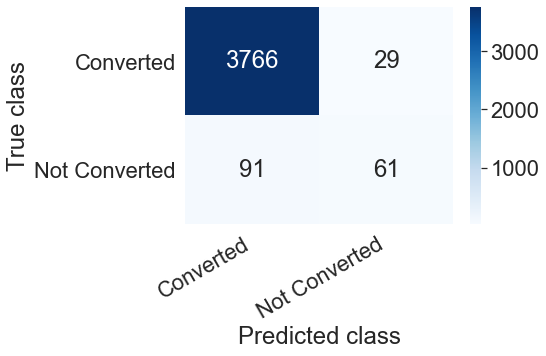

In [69]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True class')
    plt.xlabel('Predicted class');

class_names = ["Converted","Not Converted"]
cm = metrics.confusion_matrix(y_true=val_y, y_pred=predicted_gb)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [70]:
regr.fit(train_X, train_y)
predicted_Ada = regr.predict(val_X)

print('Classification report:\n', metrics.classification_report(val_y, predicted_Ada))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3795
           1       0.69      0.41      0.52       152

    accuracy                           0.97      3947
   macro avg       0.83      0.70      0.75      3947
weighted avg       0.97      0.97      0.97      3947



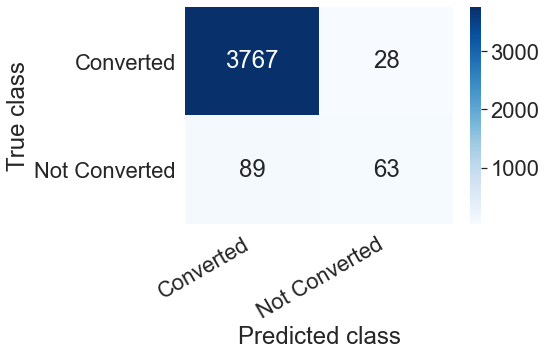

In [71]:
class_names = ["Converted","Not Converted"]
cm = metrics.confusion_matrix(y_true=val_y, y_pred=predicted_Ada)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

We first began this analysis by loading the data and exploring the drivers of impressions and clicks. We then created dummies for the features that were loaded as objects and dropped the original columns in addition to creating our target variable, the click through rate (“CTR” = clicks/impressions).


We then began predicting CTR as a regression problem. As shown above, based on our preliminary models, RandomForestRegressor fit the best with an accuracy score of 95.19%. In an attempt to improve our Random Forest model, we moved to increase its precision via hyperparameter tuning by leveraging RandomSearchCV. 


In an effort to explore additional models, we moved to fit ensemble methods including GradientBoostingClassifier, VotingClassifier (GradientBoostingClassifier, DecisionTreeClassifier, and RandomForestClassifier), VotingClassifier (KneighborsClassifier, DecisionTreeClassifier, and RandomForestClassifier) and AdaBoostClassifier. Of all of the alternative models we fit,  
VotingClassifier (GradientBoostingClassifier, DecisionTreeClassifier, and RandomForestClassifier) performed the best with an accuracy, as measured by r-squared, of 95.27% and test and train RMSE of 0.05 and 0.03, respectively. Based thereon, we determined that VotingClassifier (GradientBoostingClassifier, DecisionTreeClassifier, and RandomForestClassifier) is our best model for CTR prediction. 


After predicting clicks, we moved to our prediction of customer conversion. From our understanding, conversion is simply persuading a customer to purchase a product (i.e., converting them from zero purchases to at least one). Further, as shown by the distribution of “Units_sold”, we can see that the dominant majority of records do not result in a customer purchase. While we initially understood this as a binary classification problem, we proceeded to first attempt to solve this via regression as “Unitis_sold”, our target feature, is a non-binary discrete variable. From our preliminary attempt to predict the units sold, our best model is the hyperparameter tuned random forest model with an accuracy, as measured by r-squared, of 42.98%. 


After moving to understand conversion as a binary classification problem, we refit our models based on whether a customer made at least one purchase (i.e., zero for no purchases and 1 for one to 15 units sold). Based thereon, our best models are AdaBoostClassifier and GradientBoostingClassifier with accuracy scores, as measured by r-squared, of 97.04% and 96.96%, respectively. 


While we are very pleased with the accuracy of our two models, we further explored their classification reports. As shown above, AdaBoostClassifier better classifies the records’ true class while GradientBoostingClassifier misclassified more converted customers as “Not Converted”. As such, we have determined that AdaBoostClassifier is our best model for the prediction of customer conversion based on a binary classification. 


